# Runtime Analysis of 5% improvement dataset

In [1]:
%load_ext autoreload
%autoreload 2
import preprocessing.utils_script as utils
from preprocessing.utils import convert_leaf_to_json, get_predicates_from_path, ground_truth_distibution, load_BGPS_from_json

from graph_construction.bgp import BGP
from graph_construction.triple_pattern import TriplePattern
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_f = '/work/data/splits/splits_0.050/train.json'
val_f = '/work/data/splits/splits_0.050/val.json'
test_f = '/work/data/splits/splits_0.050/test.json'


In [3]:
utils.print_latency_stats('/work/data/data_files/processed_gt.json')

Statistics for /work/data/data_files/processed_gt.json
	Median: 37042974.5
	Std: 33512893805.38993
	Average: 5980353729.234787
	25%-quantile: 9356199.5
	75%-quantile: 317593892.0


In [4]:
def analyse_rt(file, ylim=None):
    #bgps=load_BGPS_from_json('/work/data/data_files/processed_gt.json')
    bgps = json.load(open(file, 'r'))
    jena_rt = utils.get_runtimes(bgps,runtime_field='jena_runtime')
    jena_bloom_rt = utils.get_runtimes(bgps,runtime_field='bloom_runtime')
    print('Jena Runtime:\n')
    #rt = [x*1e-9 for x in jena_rt] # nanoseocnd to seconds
    rt = [x*1e-6 for x in jena_rt] # nanoseocnd to ms
    mean_jena = np.mean(rt)
    print("Mean ", np.mean(rt))
    print("STD ", np.std(rt))
    print("Min ", np.min(rt))
    print("25% ", np.quantile(rt,q=0.25))
    print("50% ", np.quantile(rt,q=0.5))
    print("75% ", np.quantile(rt,q=0.75))
    print("Max ", np.max(rt))

    
    plt.figure(figsize=(3,6))
    if ylim != None:
        plt.ylim(*ylim)
    plt.ylabel('MS')
    plt.title('Jena RunTimes')
    plt.boxplot(rt)
    plt.clf()
    
    print('JenaBloom Runtime:\n')
    #rt = [x*1e-9 for x in jena_bloom_rt] # nanoseocnd to seconds
    rt = [x*1e-6 for x in jena_bloom_rt] # nanoseocnd to ms
    mean_jena = np.mean(rt)
    print("Mean ", np.mean(rt))
    print("STD ", np.std(rt))
    print("Min ", np.min(rt))
    print("25% ", np.quantile(rt,q=0.25))
    print("50% ", np.quantile(rt,q=0.5))
    print("75% ", np.quantile(rt,q=0.75))
    print("Max ", np.max(rt))
    
    plt.figure(figsize=(3,6))
    if ylim != None:
        plt.ylim(*ylim)
    plt.ylabel('MS')
    plt.title('JenaBloom RunTimes')
    plt.boxplot(rt)
#utils.print_latency_stats()

In [5]:
yrange = (0,380)

Jena Runtime:

Mean  6472.9705117937065
STD  37904.349230697364
Min  2.210457
25%  8.05201075
50%  28.3837315
75%  116.84618325
Max  348978.89049699996
JenaBloom Runtime:

Mean  7105.863732311189
STD  41233.6979679296
Min  2.2858769999999997
25%  7.9416424999999995
50%  27.799327499999997
75%  125.09512774999999
Max  377802.768627


<Figure size 300x600 with 0 Axes>

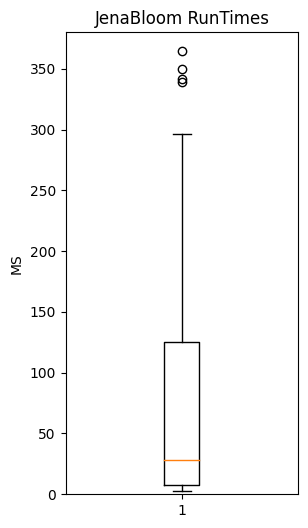

In [6]:
analyse_rt(train_f, ylim= yrange)

Jena Runtime:

Mean  7548.944423572916
STD  46758.29831549751
Min  2.669254
25%  9.43861325
50%  33.6455495
75%  204.87481225
Max  446555.274009
JenaBloom Runtime:

Mean  7891.772509458332
STD  46091.20435004419
Min  2.5923249999999998
25%  9.2574945
50%  30.963182
75%  200.6227765
Max  433660.02138399996


<Figure size 300x600 with 0 Axes>

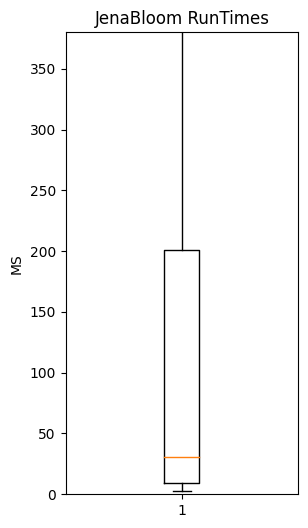

In [7]:
analyse_rt(val_f, ylim= yrange)

Jena Runtime:

Mean  3752.813095802083
STD  21243.586498475586
Min  2.053975
25%  9.80804225
50%  37.40719849999999
75%  229.44633125
Max  175292.533317
JenaBloom Runtime:

Mean  4154.067976604166
STD  23838.994712484822
Min  2.2581409999999997
25%  9.285369249999999
50%  34.751176
75%  234.92381874999998
Max  199385.498364


<Figure size 300x600 with 0 Axes>

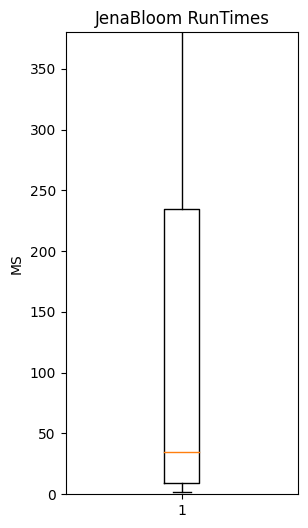

In [8]:
analyse_rt(test_f, ylim= yrange)

In [9]:
def plot_q_types(file):
    bgps = json.load(open(file, 'r'))
    paths = {}
    for v in bgps.values():
        try:
            paths[v['path'].split('/')[-1]] += 1
        except KeyError:
            paths[v['path'].split('/')[-1]] = 1
    sorted_paths = dict(sorted(paths.items(), key= lambda x: x[1], reverse=True))
    plt.clf()
    fig, ax = plt.subplots(figsize =(16, 9))
    plt.barh(list(sorted_paths.keys()), list(sorted_paths.values()), align='center', alpha=0.5)
    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 5)
    # Show top values
    ax.invert_yaxis()
    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    plt.xlabel('# of Queries')
    plt.title('Query Types in Dataset Split')
    

<Figure size 640x480 with 0 Axes>

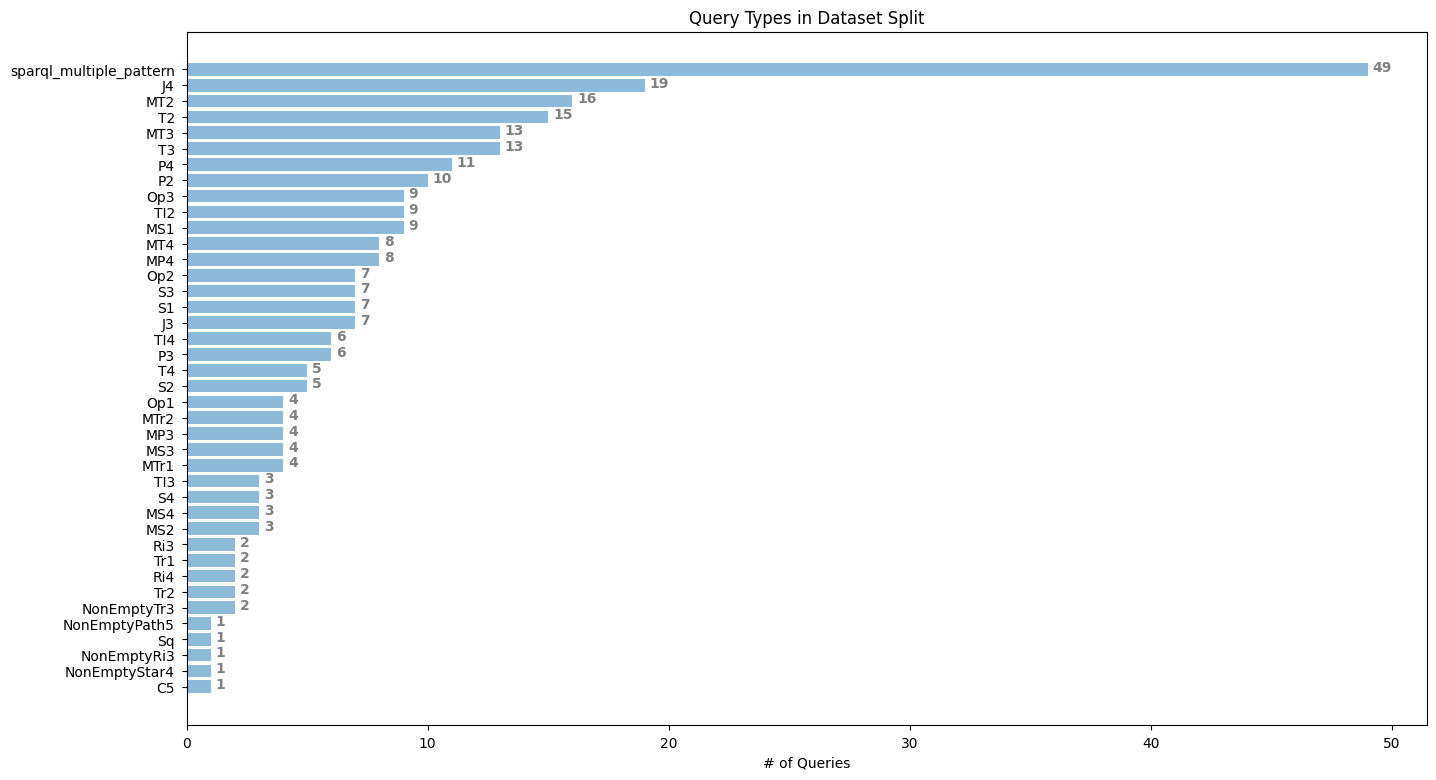

In [10]:
plot_q_types(train_f)

<Figure size 640x480 with 0 Axes>

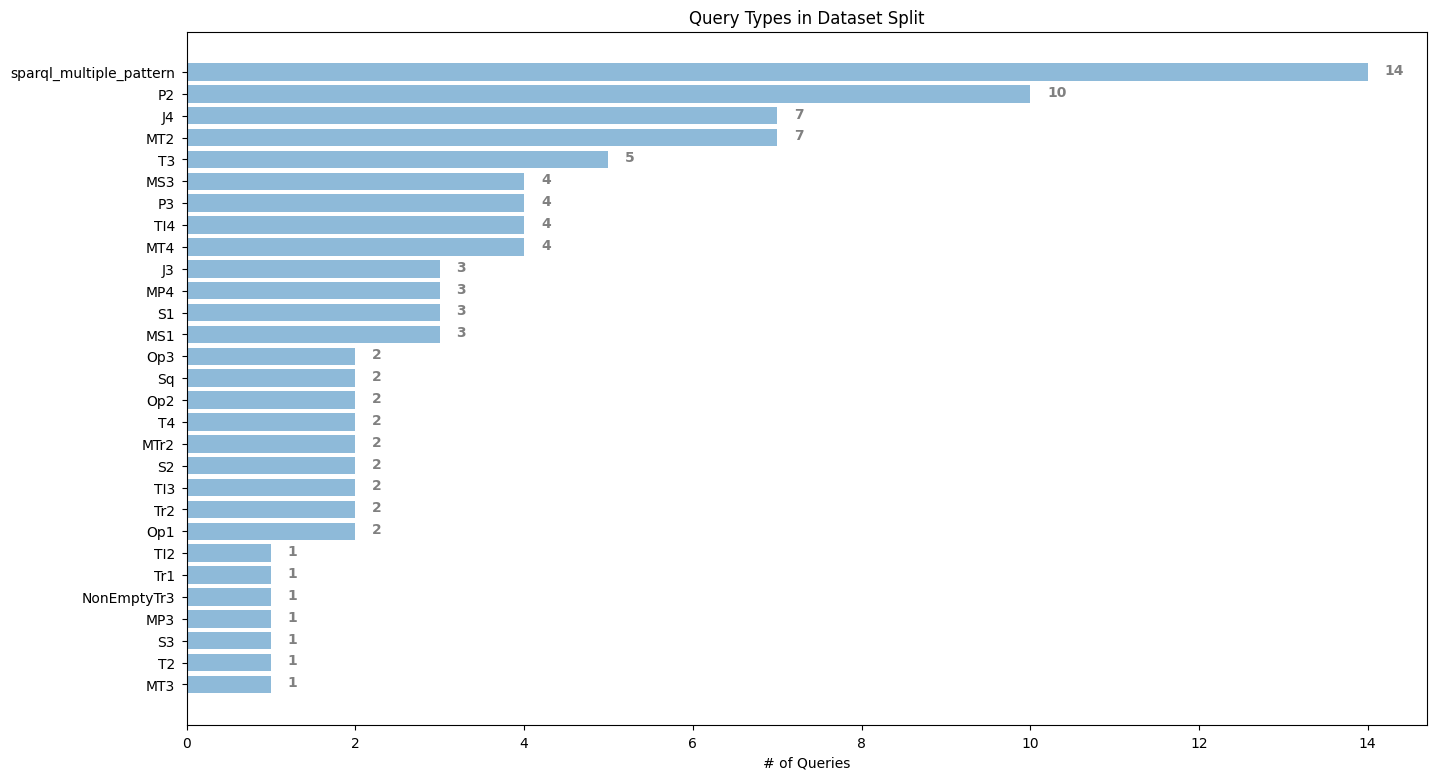

In [11]:
plot_q_types(val_f)

<Figure size 640x480 with 0 Axes>

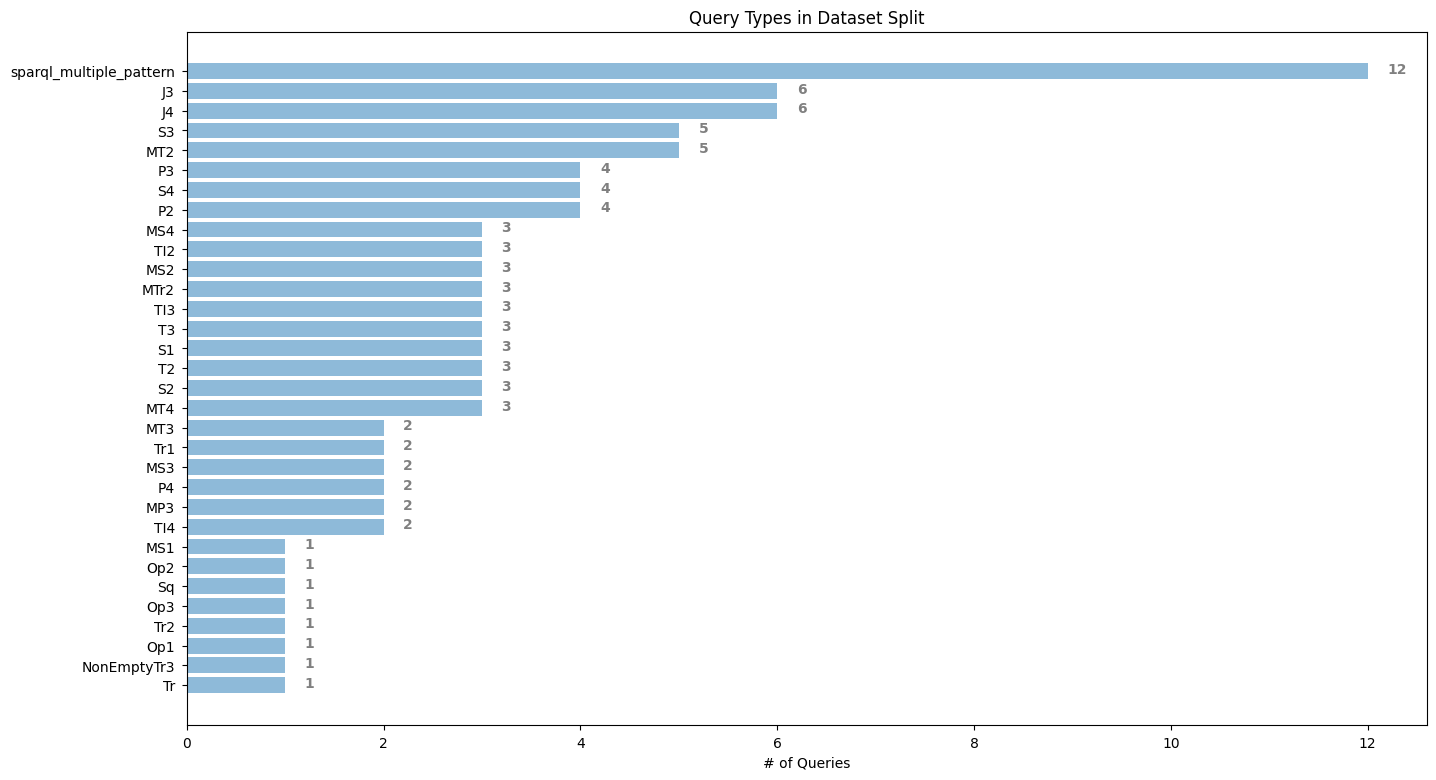

In [12]:
plot_q_types(test_f)